### Imports

In [65]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
import seaborn as sns
from pickle import dump

### Data Integration

In [66]:

print("Merging results for data integration...")
df1 = pd.read_excel("../Results/T_out1.xlsx")
df2 = pd.read_excel("../Results/T_out2.xlsx")
df3 = pd.read_excel("../Results/T_out3.xlsx")
df4 = pd.read_excel("../Results/T_out4.xlsx")
df5 = pd.read_excel("../Results/T_out5.xlsx")
df6 = pd.read_excel("../Results/T_out6.xlsx")
df7 = pd.read_excel("../Results/T_out7.xlsx")
df8 = pd.read_excel("../Results/T_out8.xlsx")
df9 = pd.read_excel("../Results/T_out9.xlsx")
df10 = pd.read_excel("../Results/T_out10.xlsx")
df11 = pd.read_excel("../Results/T_out11.xlsx")
df12 = pd.read_excel("../Results/T_out12.xlsx")
df13 = pd.read_excel("../Results/T_out13.xlsx")
df14 = pd.read_excel("../Results/T_out14.xlsx")

data = pd.concat([df1, df2, df3, df4, df5, df6, df7, df8, df9, df10, df11, df12, df13, df14])

# data = pd.read_excel("../Results/ML_input.xlsx")
print('Done.')


Merging results for data integration...
Done.


## Data Cleaning

In [67]:

print('Performing data cleaning...')
print('Inicial shape: ', data.shape)
print(data.columns)
# Rellenamos los espacios vacíos con cero
data = data.fillna(0)

# Elimino la columna de nombre del TIU
data = data.drop(['TIU'], axis=1)

# Eliminamos la fila de bin 1 ya es un bin de resultado positivo
data = data.drop(['1'], axis=1)

# Elimino las columnas que tengan socketing mejor a 30
index = data[data["Socketing"]<30].index
data = data.drop(index)
index = 0

# Elimino las colunas que no tengan algun valor mayor a 5
for col in data.columns:
    good_flag = 0
    for n in data.loc[:,col]:
        if(int(n) >= 5):
            good_flag = 1
    if((not good_flag) and (col != 'G/B_flag')):
        data = data.drop([col], axis=1)

print('Final Shape: ', data.shape)


Performing data cleaning...
Inicial shape:  (57893, 46)
Index(['Socketing', 'TIU', 'G/B_flag', 'Test_Time', 'Bines_General',
       'Bines_NLot', '1', '8', '9', '10', '11', '13', '14', '15', '18', '19',
       '20', '27', '28', '31', '35', '36', '41', '42', '43', '44', '46', '47',
       '48', '51', '54', '56', '60', '62', '64', '68', '90', '92', '94', '97',
       '98', '99', '21', '53', '67', '69'],
      dtype='object')
Final Shape:  (2468, 39)


In [68]:
data.describe().round(3)

,Socketing,G/B_flag,Test_Time,Bines_General,Bines_NLot,8,9,10,11,13,...,60,62,64,68,92,94,97,98,99,53
count,2468.000,2468.000,2468.000,2468.000,2468.000,2468.000,2468.000,2468.000,2468.000,2468.000,...,2468.000,2468.000,2468.000,2468.000,2468.000,2468.000,2468.000,2468.000,2468.000,2468.000
mean,708.047,0.817,161.896,673.482,17.857,2.184,2.412,0.587,0.434,12.007,...,0.274,0.104,0.297,0.786,0.139,8.995,0.778,0.718,0.849,0.039
std,889.846,0.387,33.930,858.701,5.404,4.155,3.778,1.610,1.182,15.904,...,0.662,0.391,1.072,1.507,1.450,15.284,4.577,2.758,1.725,0.262
min,30.000,0.000,2.107,4.000,1.615,0.000,0.000,0.000,0.000,0.000,...,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000
25%,142.750,1.000,144.321,135.000,15.250,0.000,0.000,0.000,0.000,2.000,...,0.000,0.000,0.000,0.000,0.000,1.000,0.000,0.000,0.000,0.000
50%,390.000,1.000,172.195,370.500,18.143,1.000,1.000,0.000,0.000,6.000,...,0.000,0.000,0.000,0.000,0.000,4.000,0.000,0.000,0.000,0.000
75%,929.000,1.000,178.239,892.250,20.440,2.000,3.000,1.000,1.000,15.000,...,0.000,0.000,0.000,1.000,0.000,11.000,0.000,0.000,1.000,0.000
max,7557.000,1.000,281.688,7557.000,97.889,53.000,42.000,31.000,32.000,136.000,...,8.000,5.000,32.000,24.000,57.000,333.000,72.000,62.000,19.000,5.000


### Reducción de dimensionalidad
Se busca correlation de los datos para reducir las dimensiones, recordando que para naive bayes lo mejor es que las características sean independientes entre si.

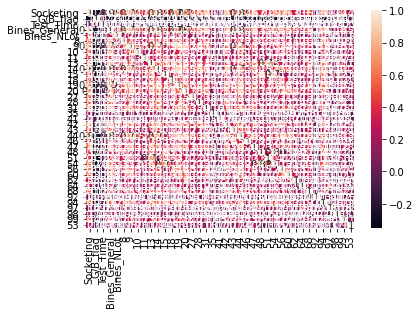

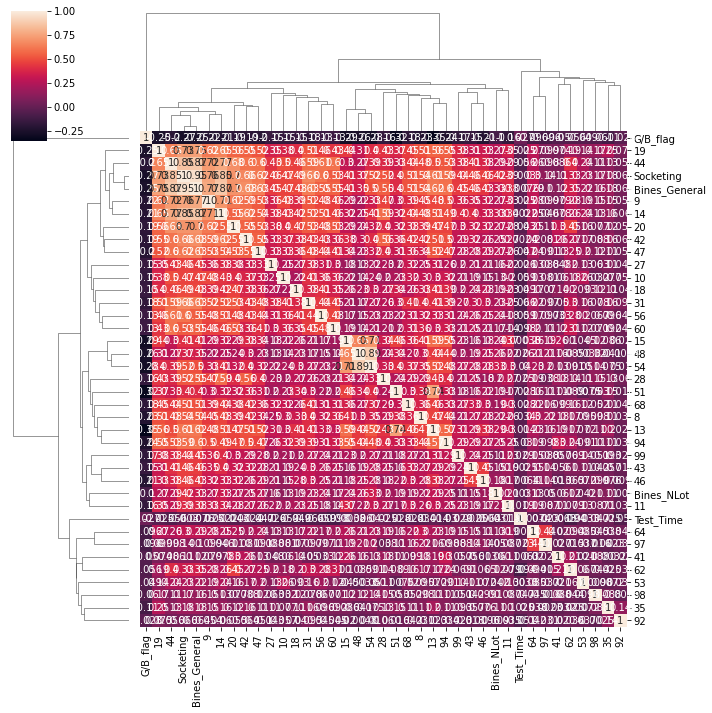

In [69]:
# calculate the correlations
correlations = data.corr()
correlations.to_excel("Correlation.xlsx")
# plot the heatmap 
sns.heatmap(correlations, xticklabels=correlations.columns, yticklabels=correlations.columns, annot=True)

# plot the clustermap 
sns.clustermap(correlations, xticklabels=correlations.columns, yticklabels=correlations.columns, annot=True)


Relaciones altas encontradas entre bines:

- bin 51 y bin13: 0.75
- Bin 44 y bin 14: 0.73
- Bin 44 y Bin 20: 0.71
- Bin54 y Bin48: 0.88

Por experiencia del proceso sabemos que tanto el bin 13 como el 51 están asociados a fallos en este colateral por lo que decido dejar ambos como naive asumption
se ve que el bin 44 representa bien la dinámica del bin 14 y el 20 por lo tanto se deja solo en 44
y también por proceso sabemos que el bin54 está asociado a la TIU por lo tanto se eliminará el bin 48.

In [70]:
data = data.drop(['20'], axis=1)
data = data.drop(['14'], axis=1)
data = data.drop(['48'], axis=1)

print('Nueva dimension: ', data.shape)

Nueva dimension:  (2468, 36)


In [71]:
data

,Socketing,G/B_flag,Test_Time,Bines_General,Bines_NLot,8,9,10,11,13,...,60,62,64,68,92,94,97,98,99,53
4,3976,1,190.3632,426,53.250,2,1,0,1,4,...,0,0,0,4,0,16,0,5,0,0.0
5,5567,0,173.6500,592,53.818,2,2,0,1,8,...,0,0,1,5,0,19,0,7,1,0.0
290,2386,1,181.7099,785,19.625,8,2,0,1,29,...,0,0,4,4,0,32,58,0,3,0.0
291,3341,0,166.3690,1043,16.823,13,2,0,1,65,...,0,0,4,7,0,46,60,0,3,0.0
294,164,1,174.6183,40,40.000,1,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2474,1227,1,191.1639,1231,18.652,0,3,0,0,4,...,0,0,1,1,0,5,0,2,1,0.0
2475,1718,0,158.0830,1718,19.089,0,4,0,0,8,...,0,0,2,1,0,6,0,2,2,0.0
2476,87,1,136.9430,87,17.400,0,0,1,0,0,...,0,0,0,0,0,1,0,0,0,0.0
2626,267,1,200.2192,267,16.688,0,1,0,0,2,...,0,0,0,0,4,2,12,1,0,0.0


### Data Normalization

In [72]:
print('Begining with data normalization...')
Scaler = MinMaxScaler()
buffer = data.copy()
columnas = data.columns
data = pd.DataFrame(Scaler.fit_transform(data), columns=columnas)

for i in range(len(data)):
    data.iloc[i, 1] = int(buffer.iloc[i, 1])


Begining with data normalization...


In [73]:
# save the scaler
dump(Scaler, open('scaler.pkl', 'wb'))

Guardar resultados finales

In [74]:
# creating a new excel file and save the data
data.to_excel("../Results/ML_input.xlsx", index=False)